# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
# #Installing all necessary labraries
# !pip install bs4
# !pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
# print(soup.prettify())

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
list_of_links = []
main_web_url = r"https://www.justwatch.com"
ancher_tag = soup.find_all("a", class_="title-list-grid__item--link")

for tag in ancher_tag:
  href = tag.get("href")
  link = main_web_url + href
  list_of_links.append(link)

print(list_of_links)

['https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/article-370', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/laapataa-ladies', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/anatomie-dune-chute', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/amar-singh-chamkila', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/fighter-2022', 'https://www.justwatch.com/in/movie/dune-2021', 'https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'https://www.justwatch.com/in/movie/monkey-man', 'https://www.justwatch.com/in/mov

## **Scrapping Movie Title**

In [ ]:
import time
import requests
from bs4 import BeautifulSoup

list_of_movies_titles = []
for link in list_of_links:
    try:
        response = requests.get(link)

        # Check if the response status code is 429 (Too Many Requests)
        if response.status_code == 429:
            # If a 429 error is encountered, wait for an increasingly longer time before retrying
            time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
            response = requests.get(link)  # Retry the request

        soup = BeautifulSoup(response.text, "html.parser")
        title_tag = soup.find("h1")

        if title_tag:
            title = title_tag.text.split("(")[0].strip()
            list_of_movies_titles.append(title)
        else:
            list_of_movies_titles.append("Title not found")
    except Exception as e:
        print(e)

print(len(list_of_movies_titles))
print(list_of_movies_titles)


## **Scrapping release Year**

In [ ]:
# Initialize an empty list to store movie release years
list_of_movies_release_year = []

# Iterate over each link in the provided list_of_links
for link in list_of_links:
    try:
        # Send a request to the current link
        response = requests.get(link)

        # Check if the response status code is 429 (Too Many Requests)
        if response.status_code == 429:
            # If a 429 error is encountered, wait for an increasingly longer time before retrying
            time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
            response = requests.get(link)  # Retry the request

        # Parse the response content using BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        # Find the tag containing the movie release year
        release_tag = soup.find('span', class_='text-muted')

        # Extract the release year if the tag is found
        if release_tag:
            release_year = release_tag.text.strip()[1:-1]  # Extract and clean the release year
            list_of_movies_release_year.append(release_year)
        else:
            # If release year tag is not found, append a placeholder string
            list_of_movies_release_year.append("release_year Not Found")

    except Exception as e:
        # Catch any exceptions that occur during processing and print the error
        print(e)

# Print the total number of movies processed
print(len(list_of_movies_release_year))

# Print the list of movie release years
print(list_of_movies_release_year)

## **Scrapping Genres**

In [ ]:
# Write Your Code here
list_of_movies_genre = []
for link in list_of_links:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    genre_heading = soup.find("h3", class_="detail-infos__subheading", string="Genres")

    if genre_heading:
      genre = genre_heading.find_next("div", class_="detail-infos__value")
      list_of_movies_genre.append(genre.text)
    else:
      list_of_movies_genre.append("Genre Not Found")

  except Exception as e:
    print(e)
  # time.sleep(4)
print(list_of_movies_genre)

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
list_of_movies_rating = []
for link in list_of_links:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    rating_tag = soup.find_all("div", class_="jw-scoring-listing__rating")

    if rating_tag:
      rating = rating_tag[1].text.split("(")[0]
      list_of_movies_rating.append(rating.strip())
    else:
      list_of_movies_rating.append("Rating Not Found")

  except Exception as e:
    print(e)
  # time.sleep(4)

print(list_of_movies_rating)

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
list_of_movies_runtime = []
for link in list_of_links:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    runtime_heading = soup.find("h3", class_="detail-infos__subheading", string="Runtime")

    if runtime_heading:
      runtime = runtime_heading.find_next("div", class_="detail-infos__value")
      list_of_movies_runtime.append(runtime.text)
    else:
      list_of_movies_runtime.append("runtime Not Found")

  except Exception as e:
    print(e)
  # time.sleep(4)

print(list_of_movies_runtime)

In [ ]:
list_of_movies_runtime

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
list_of_movies_age_rating = []
for link in list_of_links:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    age_rating_heading = soup.find("h3", class_="detail-infos__subheading", string="Age rating")

    if age_rating_heading:
      age_rating = age_rating_heading.find_next("div", class_="detail-infos__value")
      list_of_movies_age_rating.append(age_rating.text)
    else:
      list_of_movies_age_rating.append("Age Rating Not Found")

  except Exception as e:
    print(e)
  # time.sleep(4)

print(list_of_movies_age_rating)

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
list_of_movies_country = []
for link in list_of_links:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    country_heading = soup.find("h3", class_="detail-infos__subheading", string=" Production country ")

    if country_heading:
      country = country_heading.find_next("div", class_="detail-infos__value")
      list_of_movies_country.append(country.text)
    else:
      list_of_movies_country.append("Genre Not Found")

  except Exception as e:
    print(e)
  # time.sleep(4)

print(list_of_movies_country)

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
list_of_movies_streaming_service = []
for link in list_of_links:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    streaming_tag = soup.find("img", class_="offer__icon")

    if streaming_tag:
      striming_service = streaming_tag.get("alt")

      list_of_movies_streaming_service.append(striming_service)
    else:
      list_of_movies_streaming_service.append("striming_service not found")

  except Exception as e:
    print(e)
  # time.sleep(4)

print(list_of_movies_streaming_service)

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
movie_dic_df = {
    "Movie-Title": list_of_movies_titles,
    "Release-Year": list_of_movies_release_year,
    "Genre": list_of_movies_genre,
    "IMBD-Rating": list_of_movies_rating,
    "Runtime": list_of_movies_runtime,
    "country": list_of_movies_country,
    "Streaming-Service": list_of_movies_streaming_service,
    "Age-Rating": list_of_movies_age_rating,
    "Links": list_of_links
}

movie_df = pd.DataFrame(movie_dic_df)
movie_df

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

response = requests.get(tv_url)
soup = BeautifulSoup(response.text, "html.parser")
print(soup.prettify())

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
list_of_links_for_tv_show = []
main_web_url_for_tv_show = r"https://www.justwatch.com"
ancher_tag = soup.find_all("a", class_="title-list-grid__item--link")
for tag in ancher_tag:
  href = tag.get("href")
  link = main_web_url_for_tv_show + href
  list_of_links_for_tv_show.append(link)

print(list_of_links_for_tv_show)

['https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/the-gentlemen', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/maharani-2021', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/maamla-legal-hai', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen', 'https://www.justwatch.com/in/tv-show/halo', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/avatar-the-last-airbender', 'https://www.justwatch.com/in/tv-show/invincible', 'https://www.justwatch.com/in/tv-show/supersex', 'https://www.justwatch.com/in/tv-show/inspector-rishi', 'https://www.justwatch.com/in/tv

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
list_of_tv_show_titles = []
for link in list_of_links_for_tv_show:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    title_heading = soup.find("h1")

    if title_heading:
      title = title_heading.text.split("(")[0].strip()
    else:
      title = "title not found"

    list_of_tv_show_titles.append(title)

  except Exception as e:
    print(e)

  # time.sleep(4)

print(list_of_tv_show_titles)

['Shōgun', 'Mirzapur', '3 Body Problem', 'Panchayat', 'The Gentlemen', 'Game of Thrones', 'Maharani', 'Sunflower', 'Maamla Legal Hai', 'Solo Leveling', 'Apharan', 'Jujutsu Kaisen', 'Halo', 'Attack on Titan', 'Avatar: The Last Airbender', 'Invincible', 'Supersex', 'Inspector Rishi', 'Young Sheldon', 'Mastram', 'Saving the Tigers', 'Farzi', 'True Detective', 'Queen of Tears', 'Loki', 'Naruto', 'The Family Man', 'Yellowstone', 'Lootere', 'Reacher', 'Turning Point: The Bomb and the Cold War', 'Scam 1992', 'Euphoria', 'Naruto Shippūden', 'Gullak', 'Money Heist', 'Young Royals', 'Gandii Baat', 'House of the Dragon', 'The Rookie', '9-1-1', 'Under the Dome', 'The Vampire Diaries', "X-Men '97", 'Peaky Blinders', 'Lucifer', 'Breaking Bad', 'Aashram', 'Modern Family', 'Dark Desire', 'One Day', 'Dehati Ladke', 'Testament: The Story of Moses', 'The Great Indian Kapil Show', 'The Signal', "Grey's Anatomy", 'Ripley', 'Aarya', 'Shaitan', 'A Gentleman in Moscow', 'Stranger Things', 'Avatar: The Last Ai

## **Fetching Release Year**

In [ ]:
# Write Your Code here
list_of_tv_show_release_year = []
for link in list_of_links_for_tv_show:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    release_year_heading = soup.find("h1")

    if release_year_heading:
      release_year = release_year_heading.text.split("(")[1].strip()[:-1]
    else:
      release_year = "release_year not found"

    list_of_tv_show_release_year.append(release_year)

  except Exception as e:
    print(e)

  # time.sleep(4)

print(list_of_tv_show_release_year)

['2024', '2018', '2024', '2020', '2024', '2011', '2021', '2021', '2024', '2024', '2018', '2020', '2022', '2013', '2024', '2021', '2024', '2024', '2017', '2020', '2023', '2023', '2014', '2024', '2021', '2002', '2019', '2018', '2024', '2022', '2024', '2020', '2019', '2007', '2019', '2017', '2021', '2018', '2022', '2018', '2018', '2013', '2009', '2023', '2013', '2016', '2008', '2020', '2009', '2020', '2024', '2023', '2024', '2024', '2024', '2005', '2024', '2020', '2023', '2024', '2016', '2005', '2015', '2024', '2014', '2024', '2011', '2024', '2017', '2023', '2020', '2024', 'BGDC', '2023', '2023', '2021', '2019', '2023', '2024', '2009', '2023', '2022', '2014', '2018', '2022', '2022', '2019', '2010', '2014', '2023', '2006', '2024', '2022', '2005', '2021', '2022', '2010', '2022', '2022', '2018']


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
list_of_tv_show_genre = []
for link in list_of_links_for_tv_show:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    genre_heading = soup.find("h3", class_="detail-infos__subheading", string="Genres")
    if genre_heading:
      genre_tag = genre_heading.find_next("div", class_="detail-infos__value")
      genre = genre_tag.text.strip()
    else:
      genre = "Genre not Found"
    list_of_tv_show_genre.append(genre)
  except Exception as e:
    print(e)
  # time.sleep(4)

print(list_of_tv_show_genre)

['Drama, War & Military, History', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'Science-Fiction, Mystery & Thriller, Drama, Fantasy', 'Drama, Comedy', 'Action & Adventure, Comedy, Crime, Drama', 'Action & Adventure, Drama, Fantasy, Science-Fiction', 'Drama', 'Comedy, Crime', 'Drama, Comedy', 'Fantasy, Animation, Action & Adventure, Science-Fiction', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Mystery & Thriller, Animation, Action & Adventure, Fantasy, Science-Fiction', 'Action & Adventure, Science-Fiction, Mystery & Thriller, War & Military', 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction', 'Science-Fiction, Action & Adventure, Comedy, Drama, Kids & Family, Fantasy', 'Science-Fiction, Action & Adventure, Drama, Animation, Mystery & Thriller, Fantasy', 'Drama, History', 'Horror, Mystery & Thriller, Action & Adventure, Drama', 'Kids & Family, Comedy', 'Drama, Fantasy, Comedy', 'Comedy, Drama, Mystery & Thriller', 'Crime, Drama, Mystery & 

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
list_of_tv_show_rating= []
for link in list_of_links_for_tv_show:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    rating_tag = soup.find_all("div", class_="jw-scoring-listing__rating")

    if rating_tag:
      rating = rating_tag[1].text.split("(")[0]
      list_of_tv_show_rating.append(rating.strip())
    else:
      list_of_tv_show_rating.append("Rating Not Found")

  except Exception as e:
    print(e)

print(list_of_tv_show_rating)

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
list_of_tv_show_age_rating= []
for link in list_of_links_for_tv_show:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    age_rating_heading = soup.find("h3", class_="detail-infos__subheading", string="Age rating")

    if age_rating_heading:
      age_rating = age_rating_heading.find_next("div", class_="detail-infos__value")
      list_of_tv_show_age_rating.append(age_rating.text)
    else:
      list_of_tv_show_age_rating.append("Age Rating Not Found")

  except Exception as e:
    print(e)

print(list_of_tv_show_age_rating)

['Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'A', 'Age Rating Not Found', 'UA', 'A', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'UA', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'A', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'A', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'A', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
list_of_tv_show_country = []
for link in list_of_links_for_tv_show:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    country_heading = soup.find("h3", class_="detail-infos__subheading", string=" Production country ")
    if country_heading:
      country_tag = country_heading.find_next("div", class_="detail-infos__value")
      country = country_tag.text.strip()
    else:
      country = "Country Not Found"
    list_of_tv_show_country.append(country)

  except Exception as e:
    print(e)
  # time.sleep(4)

print(list_of_tv_show_country)

KeyboardInterrupt: 

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
list_of_tv_show_streaming_service = []
for link in list_of_links_for_tv_show:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    img_tag = soup.find("img", class_="offer__icon")
    if img_tag:
      streaming_service = img_tag.get("alt").strip()
    else:
      streaming_service = "streaming_service not found"

    list_of_tv_show_streaming_service.append(streaming_service)

  except Exception as e:
    print(e)
  # time.sleep(4)

print(list_of_tv_show_streaming_service)

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
list_of_tv_show_runtime = []
for link in list_of_links_for_tv_show:
  try:
    response = requests.get(link)
    # Check if the response status code is 429 (Too Many Requests)
    if response.status_code == 429:
        # If a 429 error is encountered, wait for an increasingly longer time before retrying
        time.sleep(5)  # Wait for 5 seconds (you can adjust this value)
        response = requests.get(link)  # Retry the request

    soup = BeautifulSoup(response.text, "html.parser")

    runtime_heading = soup.find("h3", class_="detail-infos__subheading", string="Runtime")
    if runtime_heading:
      runtime = runtime_heading.find_next("div", class_="detail-infos__value").text.strip()
    else:
      runtime = "runtime Not found"
    list_of_tv_show_runtime.append(runtime)

  except Exception as e:
    print(e)
  # time.sleep(4)


print(list_of_tv_show_runtime)

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tv_show_dic = {
    "Title": list_of_tv_show_titles,
    "Release-Year": list_of_tv_show_release_year,
    "Genre": list_of_tv_show_genre,
    "IMBD-Rating": list_of_tv_show_rating,
    "Age-Rating": list_of_tv_show_age_rating,
    "Country": list_of_tv_show_country,
    "Runtime": list_of_tv_show_runtime,
    "Streaming-Service": list_of_tv_show_streaming_service,
    "links": list_of_links_for_tv_show
}

tv_show_df = pd.DataFrame(tv_show_dic)
tv_show_df

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
movie_df

,Movie-Title,Release-Year,Genre,IMBD-Rating,Runtime,country,Streaming-Service,Age-Rating,Links
0,Hanu-Man,2024,"Fantasy, Action & Adventure, Comedy, Science-F...",8.0,2h 39min,India,Jio Cinema,UA,https://www.justwatch.com/in/movie/hanu-man
1,Oppenheimer,2023,"Drama, History",8.3,3h 0min,"United States, United Kingdom",Apple TV,UA,https://www.justwatch.com/in/movie/oppenheimer
2,Teri Baaton Mein Aisa Uljha Jiya,2024,"Comedy, Drama, Romance, Science-Fiction",6.6,2h 21min,India,Amazon Prime Video,Age Rating Not Found,https://www.justwatch.com/in/movie/untitled-sh...
3,Fighter,2024,"Action & Adventure, Mystery & Thriller, War & ...",6.4,2h 47min,India,Netflix,UA,https://www.justwatch.com/in/movie/fighter-2022
4,Poor Things,2023,"Science-Fiction, Romance, Comedy, Drama",8.0,2h 22min,"Ireland, United Kingdom, United States",Apple TV,A,https://www.justwatch.com/in/movie/poor-things
...,...,...,...,...,...,...,...,...,...
95,Pushpa: The Rise - Part 1,2021,"Action & Adventure, Drama, Mystery & Thriller,...",Rating Not Found,2h 55min,India,Amazon Prime Video,UA,https://www.justwatch.com/in/movie/pushpa
96,Emily the Criminal,2022,"Drama, Mystery & Thriller, Crime",6.7,1h 37min,United States,Netflix,Age Rating Not Found,https://www.justwatch.com/in/movie/emily-the-c...
97,Fast X,2023,"Mystery & Thriller, Action & Adventure, Crime",5.8,2h 22min,United States,Apple TV,UA,https://www.justwatch.com/in/movie/fast-x
98,The Boy and the Heron,2023,"Animation, Action & Adventure, Fantasy, Kids &...",Rating Not Found,2h 4min,Japan,striming_service not found,Age Rating Not Found,https://www.justwatch.com/in/movie/kimitachi-w...


In [ ]:
df = movie_df.copy()
df

,Movie-Title,Release-Year,Genre,IMBD-Rating,Runtime,country,Streaming-Service,Age-Rating,Links
0,Hanu-Man,2024,"Fantasy, Action & Adventure, Comedy, Science-F...",8.0,2h 39min,India,Jio Cinema,UA,https://www.justwatch.com/in/movie/hanu-man
1,Oppenheimer,2023,"Drama, History",8.3,3h 0min,"United States, United Kingdom",Apple TV,UA,https://www.justwatch.com/in/movie/oppenheimer
2,Teri Baaton Mein Aisa Uljha Jiya,2024,"Comedy, Drama, Romance, Science-Fiction",6.6,2h 21min,India,Amazon Prime Video,Age Rating Not Found,https://www.justwatch.com/in/movie/untitled-sh...
3,Fighter,2024,"Action & Adventure, Mystery & Thriller, War & ...",6.4,2h 47min,India,Netflix,UA,https://www.justwatch.com/in/movie/fighter-2022
4,Poor Things,2023,"Science-Fiction, Romance, Comedy, Drama",8.0,2h 22min,"Ireland, United Kingdom, United States",Apple TV,A,https://www.justwatch.com/in/movie/poor-things
...,...,...,...,...,...,...,...,...,...
95,Pushpa: The Rise - Part 1,2021,"Action & Adventure, Drama, Mystery & Thriller,...",Rating Not Found,2h 55min,India,Amazon Prime Video,UA,https://www.justwatch.com/in/movie/pushpa
96,Emily the Criminal,2022,"Drama, Mystery & Thriller, Crime",6.7,1h 37min,United States,Netflix,Age Rating Not Found,https://www.justwatch.com/in/movie/emily-the-c...
97,Fast X,2023,"Mystery & Thriller, Action & Adventure, Crime",5.8,2h 22min,United States,Apple TV,UA,https://www.justwatch.com/in/movie/fast-x
98,The Boy and the Heron,2023,"Animation, Action & Adventure, Fantasy, Kids &...",Rating Not Found,2h 4min,Japan,striming_service not found,Age Rating Not Found,https://www.justwatch.com/in/movie/kimitachi-w...


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
from datetime import datetime

df["Release-Year"] = df["Release-Year"].astype(int)
current_year = datetime.now().year

recent_movies = df[df["Release-Year"] > current_year - 2]

In [ ]:
# Write Your Code here
from datetime import datetime
current_year = datetime.now().year

recent_movie = df[df["Release-Year"]>=current_year-1]
recent_movie

,Movie-Title,Release-Year,Genre,IMBD-Rating,Runtime,country,Streaming-Service,Age-Rating,Links
0,Hanu-Man,2024,"Fantasy, Action & Adventure, Comedy, Science-F...",8.0,2h 39min,India,Jio Cinema,UA,https://www.justwatch.com/in/movie/hanu-man
1,Oppenheimer,2023,"Drama, History",8.3,3h 0min,"United States, United Kingdom",Apple TV,UA,https://www.justwatch.com/in/movie/oppenheimer
2,Teri Baaton Mein Aisa Uljha Jiya,2024,"Comedy, Drama, Romance, Science-Fiction",6.6,2h 21min,India,Amazon Prime Video,Age Rating Not Found,https://www.justwatch.com/in/movie/untitled-sh...
3,Fighter,2024,"Action & Adventure, Mystery & Thriller, War & ...",6.4,2h 47min,India,Netflix,UA,https://www.justwatch.com/in/movie/fighter-2022
4,Poor Things,2023,"Science-Fiction, Romance, Comedy, Drama",8.0,2h 22min,"Ireland, United Kingdom, United States",Apple TV,A,https://www.justwatch.com/in/movie/poor-things
...,...,...,...,...,...,...,...,...,...
93,Masthu Shades Unnai Ra,2024,Comedy,7.8,2h 22min,India,Amazon Prime Video,Age Rating Not Found,https://www.justwatch.com/in/movie/masthu-shad...
94,Ricky Stanicky,2024,Comedy,6.2,1h 53min,"United States, Australia, United Kingdom",Amazon Prime Video,Age Rating Not Found,https://www.justwatch.com/in/movie/ricky-stanicky
97,Fast X,2023,"Mystery & Thriller, Action & Adventure, Crime",5.8,2h 22min,United States,Apple TV,UA,https://www.justwatch.com/in/movie/fast-x
98,The Boy and the Heron,2023,"Animation, Action & Adventure, Fantasy, Kids &...",Rating Not Found,2h 4min,Japan,striming_service not found,Age Rating Not Found,https://www.justwatch.com/in/movie/kimitachi-w...


In [ ]:
recent_movies["IMBD-Rating"] = recent_movies["IMBD-Rating"].replace('Rating Not Found', 0)

recent_movies["IMBD-Rating"] = recent_movies["IMBD-Rating"].astype(float)


filter_movies = recent_movies[recent_movies["IMBD-Rating"] >= 7]

In [ ]:
# df["IMBD-Rating"] = df["IMBD-Rating"].astype(float)
highest_rated_movie = df[df["IMBD-Rating"] >= 7]
highest_rated_movie.head()

,Movie-Title,Release-Year,Genre,IMBD-Rating,Runtime,country,Streaming-Service,Age-Rating,Links
0,Hanu-Man,2024,"Fantasy, Action & Adventure, Comedy, Science-F...",8.0,2h 39min,India,Jio Cinema,UA,https://www.justwatch.com/in/movie/hanu-man
1,Oppenheimer,2023,"Drama, History",8.3,3h 0min,"United States, United Kingdom",Apple TV,UA,https://www.justwatch.com/in/movie/oppenheimer
4,Poor Things,2023,"Science-Fiction, Romance, Comedy, Drama",8.0,2h 22min,"Ireland, United Kingdom, United States",Apple TV,A,https://www.justwatch.com/in/movie/poor-things
5,Anatomy of a Fall,2023,"Crime, Mystery & Thriller, Drama",7.7,2h 32min,France,Amazon Prime Video,Age Rating Not Found,https://www.justwatch.com/in/movie/anatomie-du...
6,Bramayugam,2024,"Horror, Mystery & Thriller",8.0,2h 19min,India,Sony Liv,Age Rating Not Found,https://www.justwatch.com/in/movie/bramayugam


## **Analyzing Top Genres**

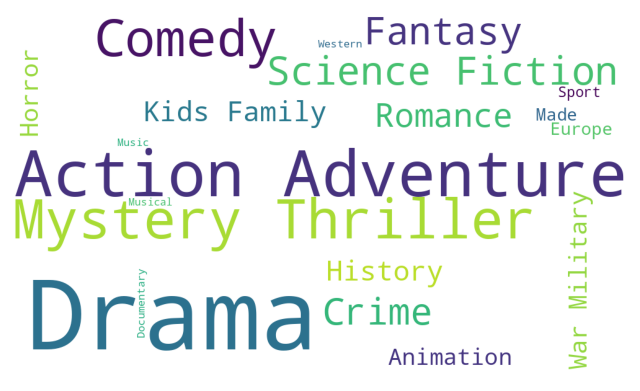

In [ ]:
# Write Your Code here
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["Genre"])
wordcloud = WordCloud(width=1000, height=600, background_color="white").generate(text)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

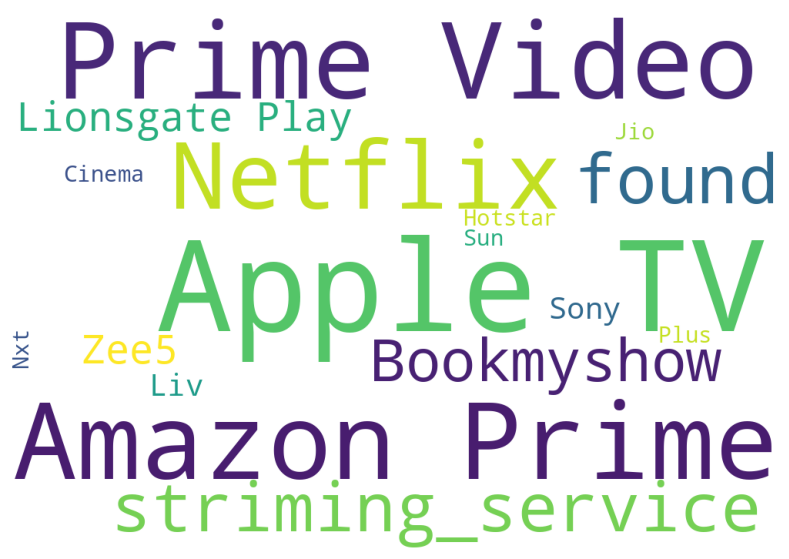

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

streaming_service = " ".join(df["Streaming-Service"])

wordcloud = WordCloud(width=1000, height=700, background_color="white").generate(streaming_service)

plt.figure(figsize=(10,7))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
streaming_service_count = df.groupby("Streaming-Service").size().reset_index(name="Count")
streaming_service_count_sorted = streaming_service_count.sort_values(by="Count", ascending=False)
streaming_service_count_sorted

,Streaming-Service,Count
1,Apple TV,25
0,Amazon Prime Video,20
7,Netflix,15
11,striming_service not found,15
3,Bookmyshow,11
6,Lionsgate Play,4
10,Zee5,4
8,Sony Liv,2
2,Apple TV Plus,1
4,Hotstar,1


In [ ]:
# Write Your Code here
# Group by 'Streaming-Service' and count occurrences
streaming_service_counts = df.groupby('Streaming-Service').size().reset_index(name="Count")

streaming_service_counts_sorted = streaming_service_counts.sort_values(by="Count", ascending=False)
streaming_service_counts_sorted

,Streaming-Service,Count
1,Apple TV,25
0,Amazon Prime Video,20
7,Netflix,15
11,striming_service not found,15
3,Bookmyshow,11
6,Lionsgate Play,4
10,Zee5,4
8,Sony Liv,2
2,Apple TV Plus,1
4,Hotstar,1


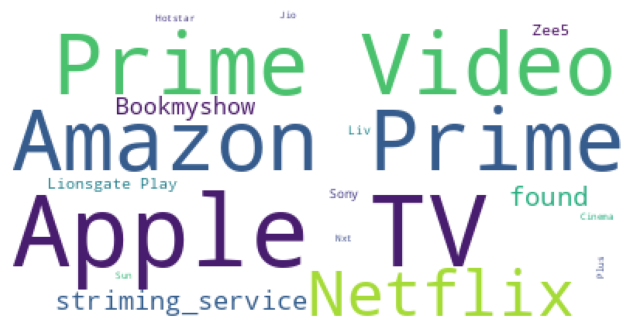

In [ ]:
text = " ".join(df["Streaming-Service"])

wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

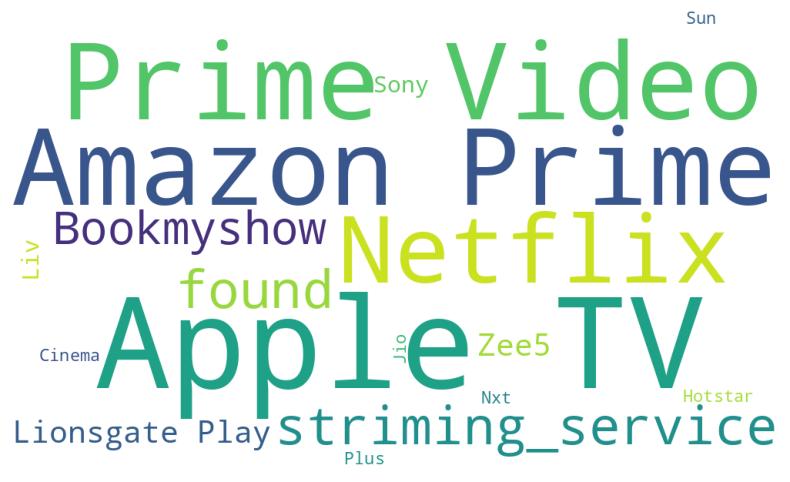

In [ ]:
#Let's Visvalize it using word cloud
text = " ".join(df["Streaming-Service"])

wordcloud = WordCloud(width=1000, height=600, background_color="white").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
df.to_csv("Orignal_DF.csv", index=False)
print("Export Done!")

Export Done!


In [ ]:
#saving filter data as Filter Data in csv format
filter_movies.to_csv("filter_movies.csv", index=False)
print("Export Done!")

Export Done!


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***